In [44]:
import pandas as pd

In [45]:
df = pd.read_csv("Data/kitCapstoneJan24_data.csv", sep=";")

In [46]:
df.head()

,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,Country A,296.0,352.0,739.0,471.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Country A,414.0,372.0,904.0,528.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Country A,405.0,604.0,1000.0,953.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Country A,359.0,483.0,828.0,972.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Country A,403.0,474.0,594.0,900.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
import xgboost
import shap
from sklearn import metrics
import matplotlib
shap.initjs()


# country a

In [48]:
#Get rows with for country A

df_country_a = df[df['countryname'] == 'Country A']
df_country_a

,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,Country A,296.0,352.0,739.0,471.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Country A,414.0,372.0,904.0,528.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Country A,405.0,604.0,1000.0,953.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Country A,359.0,483.0,828.0,972.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Country A,403.0,474.0,594.0,900.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,356,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,357,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,358,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,359,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_country_a['month_normalized'] = df_country_a['month'] % 12
df_country_a

df_country_a = df_country_a[['month_normalized','month', 'countryname'] + [col for col in df_country_a.columns if col not in ['month_normalized','month', 'countryname']]]

df_country_a


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,1,Country A,296.0,352.0,739.0,471.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Country A,414.0,372.0,904.0,528.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,Country A,405.0,604.0,1000.0,953.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,Country A,359.0,483.0,828.0,972.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,Country A,403.0,474.0,594.0,900.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,8,356,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,9,357,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,10,358,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,11,359,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  delete all vehiclegroup columns that are not the vehiclegroup x

In [50]:
x = 'vehiclegroup01'

# delete all columns that are for a diffe

df1 = df_country_a

# create new dataframe with month and all columns containing vehiclegroup01
df2 = df1.filter(regex=x)
df2.head()

# drop columns in df1 which contain vehiclegroup
df3 = df1.drop(df1.filter(regex='vehiclegroup').columns, axis=1)
df3.head()

# merge df2 and df3 by index
df4 = df2.merge(df3, left_index=True, right_index=True)
df4.head()

# is there a column month in df4?
df4.columns.str.contains('month').any()
# column month should be the first column, second column is countryname
df4 = df4[['month', 'countryname'] + [col for col in df4.columns if col not in ['month', 'countryname']]]

In [51]:
df4

,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,customer_vehicle_relationships__vehiclegroup01__active_cars,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,Country A,296.0,352.0,NaN,NaN,NaN,NaN,0.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Country A,414.0,372.0,NaN,NaN,NaN,NaN,1.0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Country A,405.0,604.0,NaN,NaN,NaN,NaN,2.0,152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Country A,359.0,483.0,NaN,NaN,NaN,NaN,2.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Country A,403.0,474.0,NaN,NaN,NaN,NaN,10.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,356,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,357,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,358,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,359,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# drop rows after row 258
test = df4.drop(df4.index[258:])

In [53]:
test.describe()

,month,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,customer_vehicle_relationships__vehiclegroup01__active_cars,leads__vehiclegroup01__won,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
count,258.000000,258.000000,258.000000,112.000000,102.000000,102.000000,102.000000,258.000000,258.000000,200.00000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,129.500000,296.325581,376.798450,241.535714,419.686275,478.284314,484.637255,219.844961,389.418605,326.22000,...,83835.888889,40909.111111,5009.333333,4943.944444,13504.388889,67619.166667,3107.555556,1591.333333,2006.388889,40082.944444
std,74.622383,110.462041,165.625562,161.313635,275.283975,159.048618,217.925766,122.549248,193.688815,234.32538,...,18332.527729,7425.136330,1349.597718,1682.419703,3344.675719,18165.653620,971.018097,363.532020,470.301423,8201.872609
min,1.000000,40.000000,58.000000,2.000000,0.000000,109.000000,73.000000,0.000000,25.000000,0.00000,...,43156.000000,24200.000000,3006.000000,2606.000000,5959.000000,30234.000000,1239.000000,993.000000,1145.000000,22183.000000
25%,65.250000,217.000000,256.000000,117.000000,260.000000,363.250000,369.250000,129.500000,246.500000,121.00000,...,71755.000000,37314.250000,4052.500000,3774.500000,11800.750000,57282.500000,2540.250000,1347.000000,1863.500000,35680.750000
50%,129.500000,281.000000,347.500000,259.500000,448.500000,466.000000,467.000000,223.500000,344.500000,341.00000,...,85957.000000,42965.000000,4963.000000,4510.500000,13903.000000,66103.500000,2962.500000,1645.500000,2015.500000,39812.500000
75%,193.750000,352.500000,483.750000,327.250000,619.750000,568.500000,595.000000,305.500000,504.250000,468.75000,...,99233.250000,46079.750000,6013.000000,6068.500000,15958.250000,82372.250000,3931.500000,1882.750000,2281.500000,47231.500000
max,258.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,564.000000,1000.000000,1000.00000,...,108347.000000,51828.000000,7130.000000,8140.000000,18242.000000,99215.000000,4869.000000,2055.000000,3177.000000,52735.000000


In [54]:
df_country_a.describe()

,month_normalized,month,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
count,360.000000,360.000000,258.000000,258.000000,258.000000,258.000000,228.000000,223.000000,192.000000,187.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,5.500000,180.500000,296.325581,376.798450,317.868217,269.883721,419.271930,457.327354,293.656250,293.016043,...,83835.888889,40909.111111,5009.333333,4943.944444,13504.388889,67619.166667,3107.555556,1591.333333,2006.388889,40082.944444
std,3.456857,104.067286,110.462041,165.625562,173.722502,201.298378,162.041752,201.284894,183.002465,190.498454,...,18332.527729,7425.136330,1349.597718,1682.419703,3344.675719,18165.653620,971.018097,363.532020,470.301423,8201.872609
min,0.000000,1.000000,40.000000,58.000000,33.000000,11.000000,1.000000,23.000000,-71.000000,4.000000,...,43156.000000,24200.000000,3006.000000,2606.000000,5959.000000,30234.000000,1239.000000,993.000000,1145.000000,22183.000000
25%,2.750000,90.750000,217.000000,256.000000,203.000000,127.500000,314.500000,317.500000,171.250000,144.500000,...,71755.000000,37314.250000,4052.500000,3774.500000,11800.750000,57282.500000,2540.250000,1347.000000,1863.500000,35680.750000
50%,5.500000,180.500000,281.000000,347.500000,281.000000,211.000000,387.000000,473.000000,247.000000,267.000000,...,85957.000000,42965.000000,4963.000000,4510.500000,13903.000000,66103.500000,2962.500000,1645.500000,2015.500000,39812.500000
75%,8.250000,270.250000,352.500000,483.750000,392.500000,361.000000,522.250000,587.000000,367.000000,392.000000,...,99233.250000,46079.750000,6013.000000,6068.500000,15958.250000,82372.250000,3931.500000,1882.750000,2281.500000,47231.500000
max,11.000000,360.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,108347.000000,51828.000000,7130.000000,8140.000000,18242.000000,99215.000000,4869.000000,2055.000000,3177.000000,52735.000000


In [55]:
# function that drops all columns which have more than 50 missing values
def drop_columns(df):
    df = df.dropna(axis=1, thresh=100)
    return df1

In [56]:
# dataframe with first 18 columns (internal data)
df_internal = test.iloc[:, :20]
df_internal.head()

,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,customer_vehicle_relationships__vehiclegroup01__active_cars,leads__vehiclegroup01__won,leads__vehiclegroup01__first_touch_point,leads__vehiclegroup01__lost,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,premises__vehiclegroup01__flag_order_start,premises__vehiclegroup01__in_sales,premises__vehiclegroup01__flag_production_start,premises__vehiclegroup01__in_production,quota__vehiclegroup01__aq
0,1,Country A,296.0,352.0,NaN,NaN,NaN,NaN,0.0,25.0,NaN,NaN,NaN,0.0,81.0,NaN,NaN,NaN,NaN,NaN
1,2,Country A,414.0,372.0,NaN,NaN,NaN,NaN,1.0,102.0,NaN,NaN,NaN,4.0,130.0,NaN,NaN,NaN,NaN,NaN
2,3,Country A,405.0,604.0,NaN,NaN,NaN,NaN,2.0,152.0,NaN,NaN,NaN,2.0,145.0,NaN,NaN,NaN,NaN,NaN
3,4,Country A,359.0,483.0,NaN,NaN,NaN,NaN,2.0,75.0,NaN,NaN,NaN,2.0,183.0,NaN,NaN,NaN,NaN,NaN
4,5,Country A,403.0,474.0,NaN,NaN,NaN,NaN,10.0,91.0,NaN,NaN,NaN,4.0,201.0,NaN,NaN,NaN,NaN,NaN


In [57]:
# dataframe with external features
df_external = test.iloc[:, 20:]
df_external.head()

,month_normalized,global_consumer__alcoholic_beverages,global_consumer__apparel,global_consumer__apparel_footwear,global_consumer__appliances,global_consumer__automobiles,global_consumer__average_disposable_income_of_urban_households_nominal,global_consumer__average_disposable_income_of_urban_households_real,global_consumer__average_income,global_consumer__beer,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,46.394457,34.695874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# datatypes of internal features
df_internal.dtypes

month                                                                int64
countryname                                                         object
sales_actuals_monthly__vehiclegroup01__orderintake                 float64
sales_actuals_monthly__vehiclegroup01__retail                      float64
sales_flow_monthly__vehiclegroup01__cp8                            float64
sales_stock_monthly__vehiclegroup01__physical                      float64
sales_stock_monthly__vehiclegroup01__grossall                      float64
sales_stock_monthly__vehiclegroup01__netimporteranddealer          float64
customer_vehicle_relationships__vehiclegroup01__terminated_cars    float64
customer_vehicle_relationships__vehiclegroup01__active_cars        float64
leads__vehiclegroup01__won                                         float64
leads__vehiclegroup01__first_touch_point                           float64
leads__vehiclegroup01__lost                                        float64
leasing_contracts__vehicl

In [17]:
# give number of missing values per column for df_internal
df_internal.isnull().sum()

month                                                                0
countryname                                                          0
sales_actuals_monthly__vehiclegroup01__orderintake                   0
sales_actuals_monthly__vehiclegroup01__retail                        0
sales_flow_monthly__vehiclegroup01__cp8                            146
sales_stock_monthly__vehiclegroup01__physical                      156
sales_stock_monthly__vehiclegroup01__grossall                      156
sales_stock_monthly__vehiclegroup01__netimporteranddealer          156
customer_vehicle_relationships__vehiclegroup01__terminated_cars      0
customer_vehicle_relationships__vehiclegroup01__active_cars          0
leads__vehiclegroup01__won                                          58
leads__vehiclegroup01__first_touch_point                            58
leads__vehiclegroup01__lost                                         58
leasing_contracts__vehiclegroup01__end                               0
leasin

NameError: name 'plt' is not defined

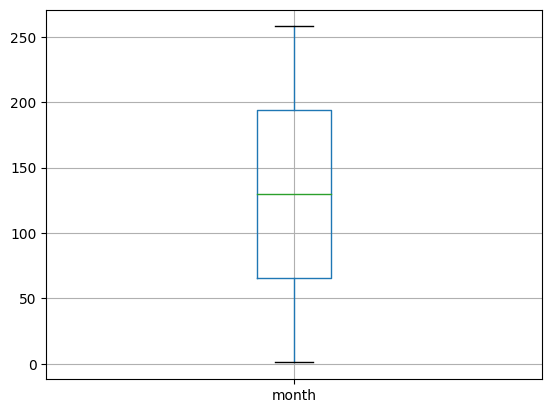

In [65]:
# create boxplot for each column in df_internal
for col in df_internal.columns:
    df_internal.boxplot(column=col)
    plt.show()

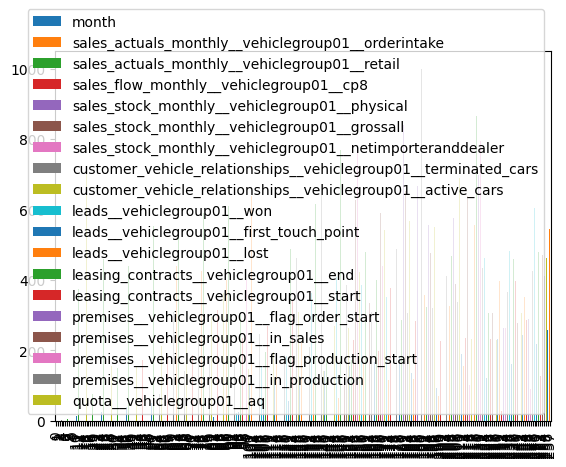

In [67]:
df_internal.plot.bar()


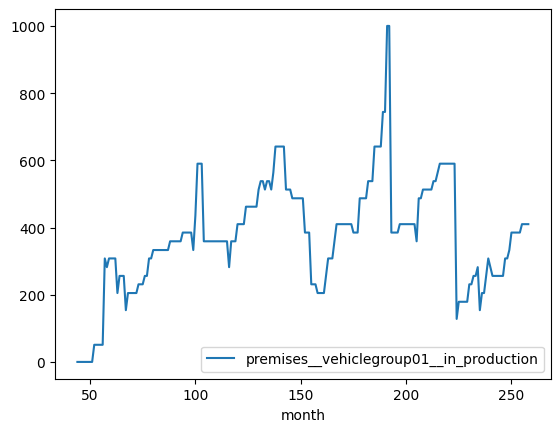

In [63]:
df_internal.plot(x='month', y='premises__vehiclegroup01__in_production')

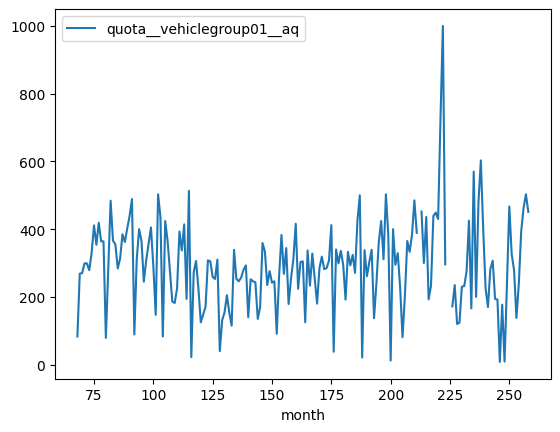

In [59]:
df_internal.plot(x='month', y='quota__vehiclegroup01__aq')

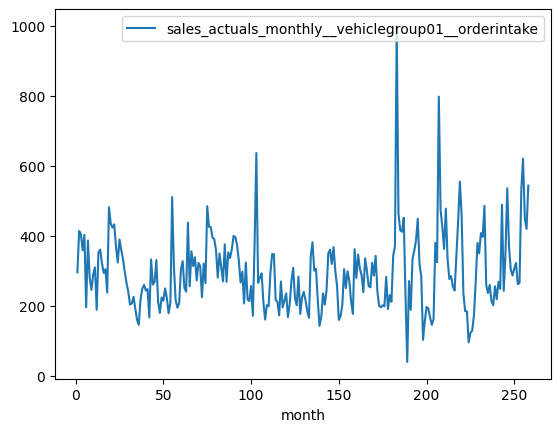

In [23]:
df_internal.plot(x='month', y='sales_actuals_monthly__vehiclegroup01__orderintake')

In [39]:
## Test for Trend

# adf test for stationarity on sales_actuals_monthly__vehiclegroup01__orderintake
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_internal['sales_actuals_monthly__vehiclegroup01__orderintake'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# hypothesis of adf
# H0: time series is not stationary
# H1: time series is stationary
# when p-value < 0.05, reject H0
# kpss test for stationarity on sales_actuals_monthly__vehiclegroup01__orderintake
from statsmodels.tsa.stattools import kpss
result = kpss(df_internal['sales_actuals_monthly__vehiclegroup01__orderintake'])
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# hypothesis of kpss
# H0: time series is stationary
# H1: time series is not stationary

ADF Statistic: -3.120375
p-value: 0.025082
KPSS Statistic: 0.188633
p-value: 0.100000


The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.



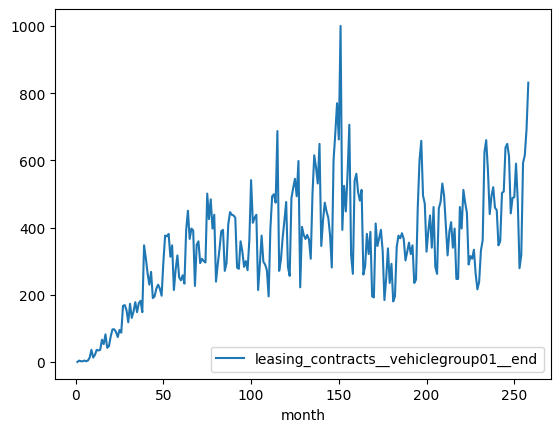

In [21]:
# plot sales_actuals_monthly__vehiclegroup01__orderintake over time
df_internal.plot(x='month', y='leasing_contracts__vehiclegroup01__end')

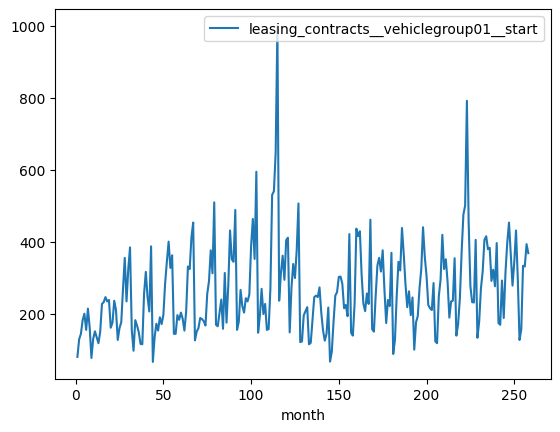

In [22]:
df_internal.plot(x='month', y='leasing_contracts__vehiclegroup01__start')

In [1]:
# number of columns which are in df_country_a but not in test1
len(set(df_country_a.columns) - set(test1.columns))

NameError: name 'df_country_a' is not defined

In [49]:
X = df_country_a.iloc[:,3:]
y = df['sales_actuals_monthly__vehiclegroup01__orderintake']

,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,customer_vehicle_relationships__vehiclegroup01__active_cars,leads__vehiclegroup01__won,leads__vehiclegroup01__first_touch_point,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,296.0,352.0,NaN,NaN,NaN,NaN,0.0,25.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,414.0,372.0,NaN,NaN,NaN,NaN,1.0,102.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,405.0,604.0,NaN,NaN,NaN,NaN,2.0,152.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,359.0,483.0,NaN,NaN,NaN,NaN,2.0,75.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,403.0,474.0,NaN,NaN,NaN,NaN,10.0,91.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,month,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,customer_vehicle_relationships__vehiclegroup01__active_cars,leads__vehiclegroup01__won,...,registrations__fueltype_electro,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe
0,1,296.0,352.0,NaN,NaN,NaN,NaN,0.0,25.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,414.0,372.0,NaN,NaN,NaN,NaN,1.0,102.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,405.0,604.0,NaN,NaN,NaN,NaN,2.0,152.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,359.0,483.0,NaN,NaN,NaN,NaN,2.0,75.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,403.0,474.0,NaN,NaN,NaN,NaN,10.0,91.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

model = xgboost.XGBRegressor().fit(X, y)

print('Accuracy Score of the Model is: ',model.score(X, y))

explainer = shap.Explainer(model)
shap_values = explainer(X)